# Angle Comparer Exploration

This notebook looks at angle-comparing methods from landmark outputs. \
Most of the code below is influenced by angl_comparer.py used for the Hatha Project.

### Notes
- (Enhancement) Is it worth considering **important angles** instead of all angles, based on a predetermined list for each distinct pose? Some poses may have important angles more so than other poses.
- (NN) The z-axis readouts are all over the place. 3D plots have z-axis points which are anatomically impossible. Throw out z-axis for NN and see if this improves our NN.

### Poses and Landmarks
<img src="landmark_description.png" width="600"/>


## ⬇️ Imports

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image


## 📖 Load Data from CSV

In [2]:
df = pd.read_csv("pose_landmark_data.csv")
df.shape

(2811, 134)

## 👀 Simple function to plot a given row in 2D/3D using matplotlib/plotly
This should be useful for varification and validation.
It appears that the y-coordinates are upside down for some reason, however this plotting **passes the sanity test**. \
The data output looks good for X and Y, however Z axis looks like its a shot in the dark. Some 3D plots are appearing to have wonky Z-axis, so it might be best to throw this out for our NN.

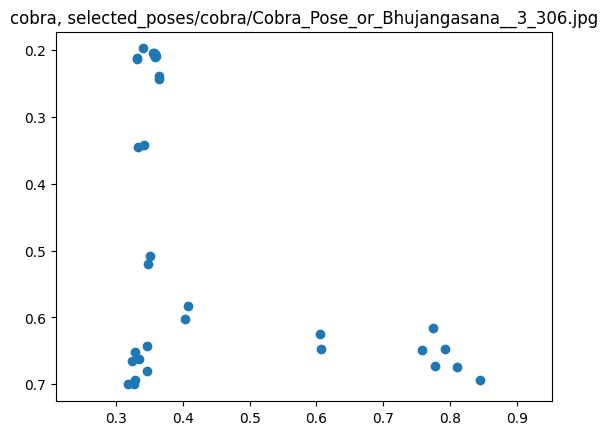

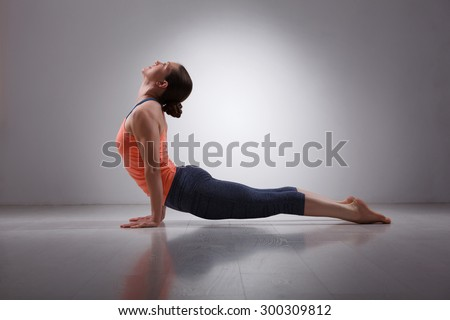

In [3]:
row = 2476
df1 = df.iloc[row]
sample_pose = df.iloc[row].pose
file_name = df.iloc[row].filename
X = df1[[col for col in df.columns if col.endswith("_x")]].values
Y = df1[[col for col in df.columns if col.endswith("_y")]].values
Z = df1[[col for col in df.columns if col.endswith("_z")]].values

coordinates = pd.DataFrame({"X": X, "Y": Y, "Z":Z})

plt.scatter(coordinates["X"], coordinates["Y"])
plt.title(f"{sample_pose}, {file_name}")
plt.xlim(0,1)
plt.ylim(1,0)
plt.axis("equal")

plt.show()

Image(filename=file_name)


# 🧪 Test angle comparer with one joint
Compare the right knee, specifically the angle made by landmarks 24, 26, and 28 (zero is the nose, so index are those numbers respectively as well)

In [4]:
downdogs = df.query("pose == 'downdog'")
wants = ['kp24_x', 'kp24_y', 'kp26_x', 'kp26_y', 'kp28_x', 'kp28_y',]
df_RLeg = downdogs[wants].copy()

In [ ]:
A = np.array((df_RLeg.iloc[0,0], df_RLeg.iloc[0,1]))
B = np.array((df_RLeg.iloc[0,2], df_RLeg.iloc[0,3]))
C = np.array((df_RLeg.iloc[0,4], df_RLeg.iloc[0,5]))

# Vector BA and BC
BA = A - B
BC = C - B

# Cosine of the angle between BA and BC
cosine_angle = np.dot(BA, BC) / (np.linalg.norm(BA) * np.linalg.norm(BC))

# Angle in radians
angle = np.arccos(cosine_angle)

# Convert to degrees
angle_degrees = np.degrees(angle)